In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


## Load data and index for day 1 only

In [9]:
# Loading data
data_path = '/Users/lauraberkowitz/Google Drive/Manuscripts/In Progress/TgF344-AD_OF/Data/'
df = pd.read_csv('/Users/lauraberkowitz/Google Drive/Manuscripts/In Progress/TgF344-AD_OF/Data/general_locomotion.csv')
df = df.loc[df['day'] == 'D1',]
df

,subID,group,day,path_length,median_velocity,median_abs_acceleration,median_abs_angular_velocity,path_length_tim1,path_length_tim2,path_length_tim3,path_length_tim4,path_length_tim5,path_length_tim6,search_area,thigmotaxis
0,Tg102_D1,tg,D1,2863.691398,4.315799,30.750483,21.849311,854.202025,452.618713,275.856484,914.856194,210.583063,155.574919,0.123292,37.933333
2,Tg103_D1,tg,D1,2577.246876,4.303752,32.889607,6.687920,1071.465217,431.748936,441.407311,212.258586,220.335522,200.031305,0.035592,342.733333
4,Tg104_D1,tg,D1,2571.390321,4.250983,30.967468,7.470793,1190.971849,302.202467,269.258626,261.174287,311.117433,236.665660,0.074317,1774.233333
6,Tg105_D1,tg,D1,4231.298992,4.649838,35.559244,6.847991,1003.111777,360.214804,452.187713,501.563807,649.846422,1264.374470,0.052392,70.033333
8,Tg106_D1,tg,D1,2125.159344,4.514121,30.560384,8.800542,1030.889088,474.185993,339.584451,145.133509,91.416380,43.949922,0.091116,1666.466667
10,Tg108_D1,tg,D1,4065.886556,4.758683,32.372756,7.896055,1683.918543,1162.711482,410.146834,380.051838,294.534114,134.523744,0.194191,999.000000
12,Tg109_D1,tg,D1,4012.926378,4.690150,32.520023,7.150948,1006.264711,192.300551,121.228788,1717.721810,593.304126,382.106392,0.159453,467.300000
14,Tg110_D1,tg,D1,4341.622111,4.825915,30.652585,7.546775,1646.921392,644.377755,421.954119,297.417460,1183.738067,147.213319,0.156036,1771.066667
16,Tg111_D1,tg,D1,4950.235597,4.663225,33.795847,6.489288,1698.886540,718.227681,991.125809,377.533151,861.969954,302.492462,0.150342,1430.833333
18,Tg112_D1,tg,D1,4799.565241,4.606794,32.847873,7.352037,1737.088720,797.877128,988.033484,590.498799,328.922677,357.144432,0.177392,735.266667


In [60]:
def log_x_axis(ax,x,round_n=2,n_steps=5):
    """
    function to space X axis in log scale without logging x values
    """
    x_log = np.linspace(math.floor(min(x)),math.ceil(max(x)),n_steps)
    ax.set_xticks(x_log)
    ax.set_xticklabels(np.round(10**x_log,round_n))
    
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.
    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27
    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2
    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])
    return (fig_width_in, fig_height_in)   

tex_fonts = {
#     # Use LaTeX to write all text
#     "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.style.use('seaborn-paper')
plt.rcParams.update(tex_fonts)
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)


## Index path length over time variables for each group

In [52]:
temp_df_tg = df.loc[df.group == 'tg','path_length_tim1':'path_length_tim6']/1000
temp_df_wt = df.loc[df.group == 'wt','path_length_tim1':'path_length_tim6']/1000


## Calculate the mean and sem for both dataframes created above

In [53]:
mean_vector_tg = temp_df_tg.mean()
sem_vector_tg = temp_df_tg.std()/np.sqrt(len(temp_df_tg))

mean_vector_wt = temp_df_wt.mean()
sem_vector_wt = temp_df_wt.std()/np.sqrt(len(temp_df_wt))

means = [mean_vector_tg,mean_vector_wt]
sem = [sem_vector_tg,sem_vector_wt]

## Plot the mean and SEM in line plot using fill between for shadded error region

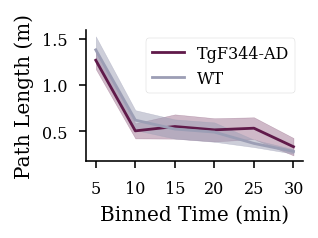

In [80]:
from sklearn import preprocessing
save_path = '/Users/lauraberkowitz/github/TgF344-AD_Open_Field/notebooks/figs/'
labels = ['tg','wt']
fig,axs = plt.subplots(figsize = set_size('thesis',fraction=.33))
colors = ['#601a4a','#9c9eb5']
x = np.arange(0,6,1)
y = means[0]
std = sem[0]
plt.fill_between(x, y-std, y+std,color=colors[0],alpha=.3)
plt.plot(x,y,colors[0])
x = np.arange(0,6,1)
y = means[1]
std = sem[1]
plt.fill_between(x, y-std, y+std,color=colors[1],alpha=.5)
plt.plot(x,y,colors[1])
plt.legend(['TgF344-AD','WT'])
axs.set(ylabel="Path Length (m)")
axs.set(xlabel="Binned Time (min)")

axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.set_xticks(np.arange(0,6,1))
axs.set_xticklabels(['5','10','15','20','25','30'])


plt.savefig(save_path+'general_loc_pathlength_time'+'.svg',dpi=300,bbox_inches='tight')
